## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [ ]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [ ]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

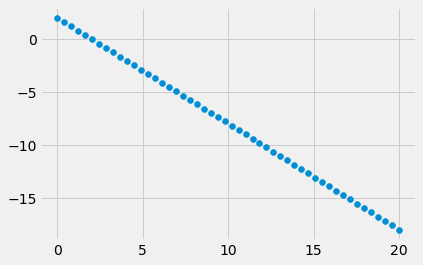

In [ ]:
plt.style.use('fivethirtyeight')
plt.scatter(X, y)

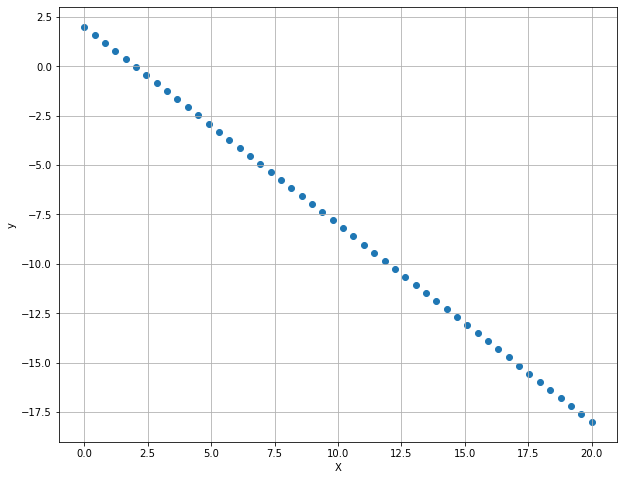

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [ ]:
def GD_SingleVariableLinear(X, y, epochs, alpha):
  theta_0 = 0
  theta_1 = 0
  theta0 = []
  theta1 = []
  y_pred = []
  Loss = []

  callback = 0


  for i in range(epochs):
    print(f"****************** Iteration {i} ******************** \n")

    h = theta_0 +  theta_1 * X
    y_pred.append(h)
    print(f"h(x): {h} \n")

    m = len(X)
    error =  (h - y)
    print(f"Error Vector: {error} \n")

    J = 1/(2*m) * sum(error**2)
    if (i > 0) and (abs(Loss[i - 1] - J) < 0.001):
      callback += 1
    print(f"J = {J} \n")

    d_theta_0 = 1/m * sum(error)
    d_theta_1 = 1/m * sum(error * X)
    Gradient_Vector = np.array([[d_theta_0], [d_theta_1]])
    print(f"Gradient Vector: \n {Gradient_Vector} \n")

    GradVec_Norm = np.linalg.norm(Gradient_Vector)
    print(f"Gradient Vector Norm: {GradVec_Norm} \n")

    theta_0 = theta_0 - d_theta_0 * alpha
    theta_1 = theta_1 - d_theta_1 * alpha

    theta0.append(theta_0)
    theta1.append(theta_1)

    print(f"theta_0_new : {theta_0}")
    print(f"theta_1_new : {theta_1} \n")

    Loss.append(J)

    if J <= 0.001 or GradVec_Norm <= 0.001 or callback == 2:
      break

  print("\n****************** Training Report ******************** \n")
  print(f"Gradient Descent converged after {i} epochs \n")
  print(f"theta_0_Opt : {theta_0}")
  print(f"theta_1_Opt : {theta_1} \n")
  print(f"Error Vector: \n {error} \n")
  print(f"Cost = {J} \n")
  print(f"h(x) = y_predict: \n {h} \n")
  print(f"y_actual: \n {y}")

  return theta0, theta1, y_pred, Loss, J, h, i

In [ ]:
theta0, theta1, y_pred, Loss, J, h, epochs = GD_SingleVariableLinear(X, y, epochs = 300, alpha = 0.001)

****************** Iteration 0 ******************** 

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

Error Vector: [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ] 

J = 49.34693877551021 

Gradient Vector: 
 [[  8.        ]
 [114.69387755]] 

Gradient Vector Norm: 114.97254258164628 

theta_0_new : -0.008
theta_1_new : -0.

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

In [ ]:
from sklearn.metrics import r2_score
r2_score(y, h)

0.9689015837651472

r2_score: 0.9686158031920962


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

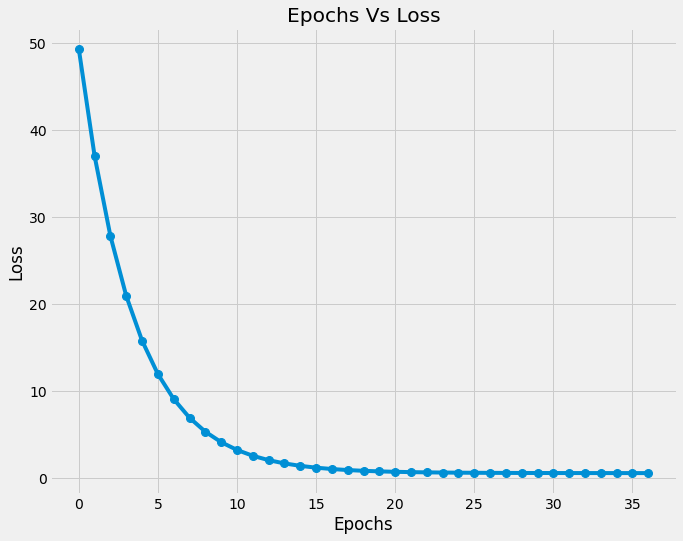

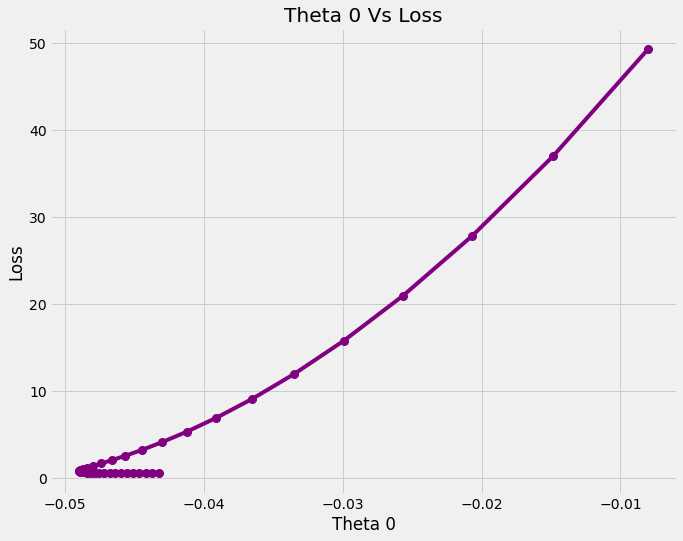

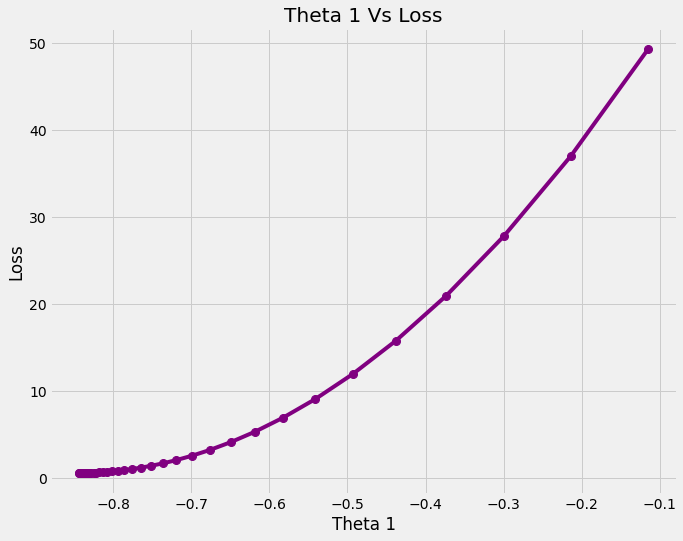

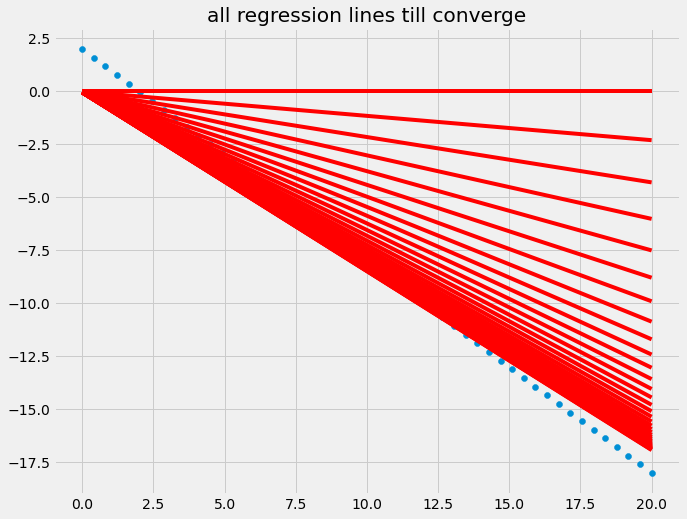

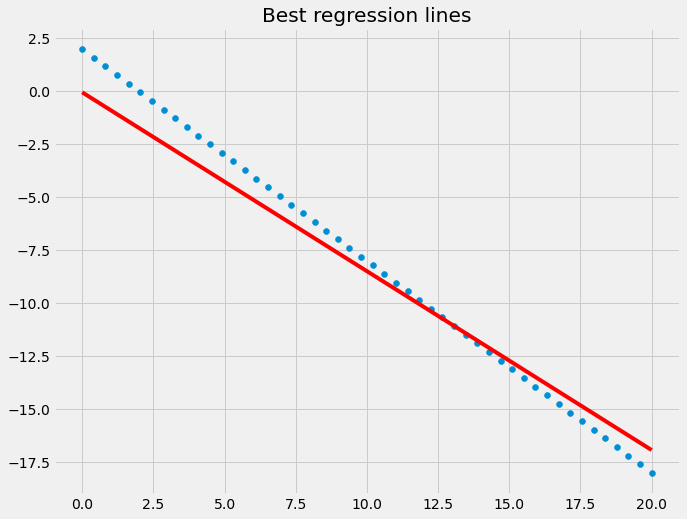

In [ ]:
plt.figure(figsize= (10, 8))
plt.style.use('fivethirtyeight')
plt.plot(np.arange(epochs + 1) ,Loss, marker = 'o', markersize = 8)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs Vs Loss')
plt.show()

plt.figure(figsize= (10, 8))
plt.plot(theta0 , Loss, color = 'purple', marker = 'o', markersize = 8)
plt.title('Learning Rate = 0.005')
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.title('Theta 0 Vs Loss')
plt.show()

plt.figure(figsize= (10, 8))
plt.plot(theta1 , Loss, color = 'purple', marker = 'o', markersize = 8)
plt.title('Learning Rate = 0.005')
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.title('Theta 1 Vs Loss')
plt.show()

plt.figure(figsize= (10, 8))
plt.scatter(X, y)
for line in y_pred:
  plt.plot(X, line, color = 'red')
plt.title('all regression lines till converge')
plt.show()

plt.figure(figsize= (10, 8))
plt.scatter(X, y)
plt.plot(X, y_pred[-1], color = 'red')
plt.title('Best regression lines')
plt.show()

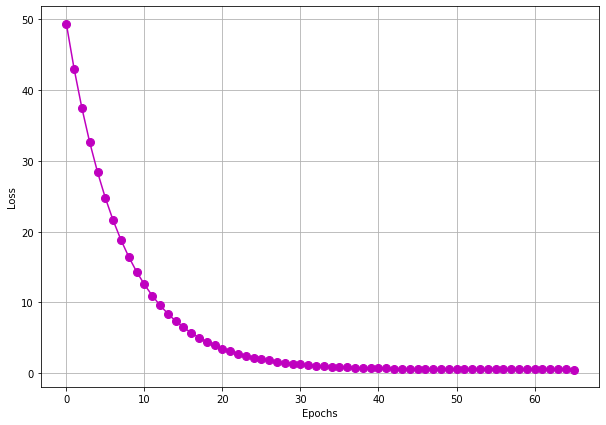

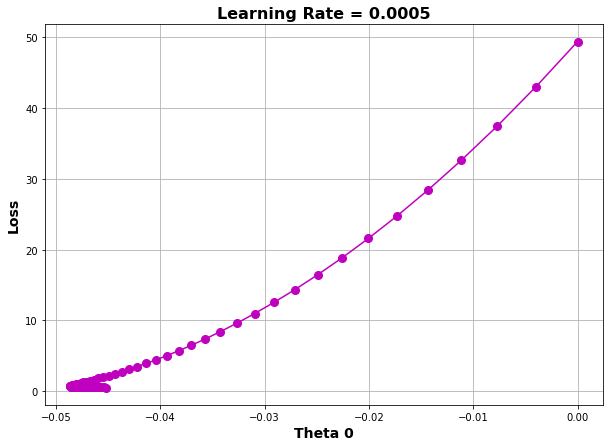

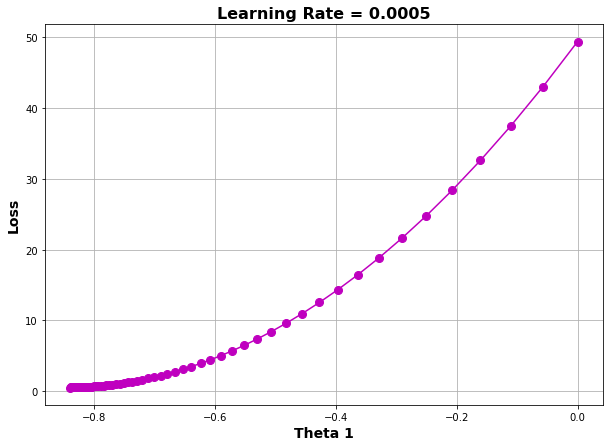

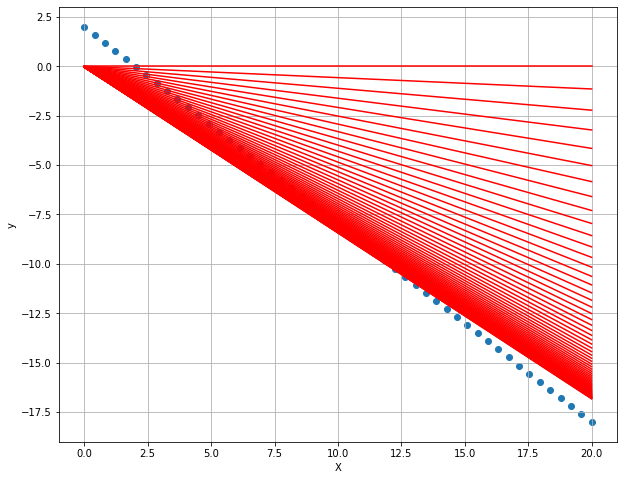

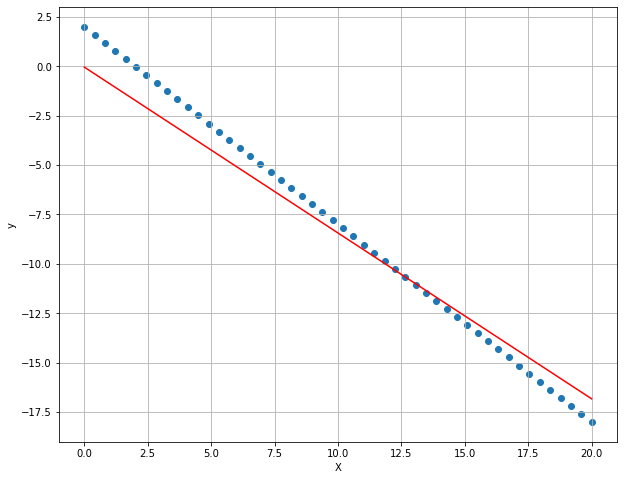

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [ ]:
def MomentumGD(X, y, epochs, alpha, Gamma):
  theta_0 = 0
  theta_1 = 0
  Vt0 = 0
  Vt1 = 0
  theta0 = []
  theta1 = []
  y_pred = []
  Loss = []
  
  callback = 0


  for i in range(epochs):
    print(f"****************** Iteration {i} ******************** \n")

    h = theta_0 +  theta_1 * X
    y_pred.append(h)
    print(f"h(x): {h} \n")

    m = len(X)
    error =  (h - y)
    print(f"Error Vector: {error} \n")

    J = 1/(2*m) * sum(error**2)
    if (i > 0) and (abs(Loss[i - 1] - J) < 0.001):
      callback += 1
    print(f"J = {J} \n")

    d_theta_0 = 1/m * sum(error)
    d_theta_1 = 1/m * sum(error * X)
    Gradient_Vector = np.array([[d_theta_0], [d_theta_1]])
    print(f"Gradient Vector: \n {Gradient_Vector} \n")

    Vt0=(Vt0*Gamma)+ alpha * d_theta_0 
    Vt1=(Vt1*Gamma)+ alpha * d_theta_1  

    
    GradVec_Norm = np.linalg.norm(Gradient_Vector)
    print(f"Gradient Vector Norm: {GradVec_Norm} \n")

    theta0.append(theta_0)
    theta1.append(theta_1)

    theta_0 = theta_0 - Vt0 
    theta_1 = theta_1 - Vt1

    print(f"theta_0_new : {theta_0}")
    print(f"theta_1_new : {theta_1} \n")

    Loss.append(J)

    if J <= 0.001 or GradVec_Norm <= 0.001 or callback == 2:
      break

  print("\n****************** Training Report ******************** \n")
  print(f"Gradient Descent converged after {i} epochs \n")
  print(f"theta_0_Opt : {theta_0}")
  print(f"theta_1_Opt : {theta_1} \n")
  print(f"Error Vector: \n {error} \n")
  print(f"Cost = {J} \n")
  print(f"h(x) = y_predict: \n {h} \n")
  print(f"y_actual: \n {y}")

  return theta0, theta1, y_pred, Loss, J, h, i

In [ ]:
theta0, theta1, y_pred, Loss, J, h, epochs = MomentumGD(X, y, epochs = 300, alpha = 0.0005, Gamma = 0.5)

****************** Iteration 0 ******************** 

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

Error Vector: [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ] 

J = 49.34693877551021 

Gradient Vector: 
 [[  8.        ]
 [114.69387755]] 

Gradient Vector Norm: 114.97254258164628 

theta_0_new : -0.004
theta_1_new : -0.

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

In [ ]:
from sklearn.metrics import r2_score
r2_score(y, h)

0.9688302192119861

r2_score: 0.9687892837396442


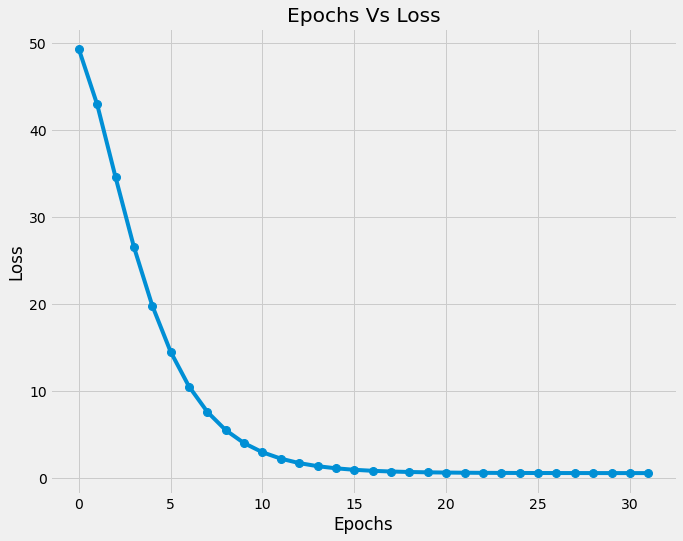

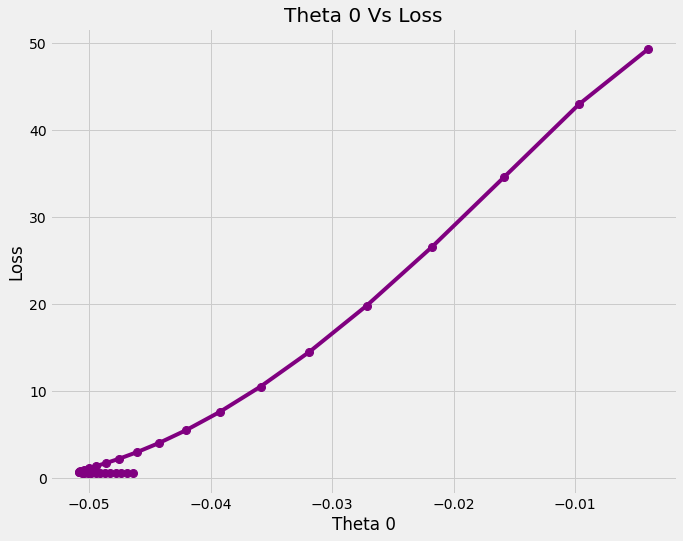

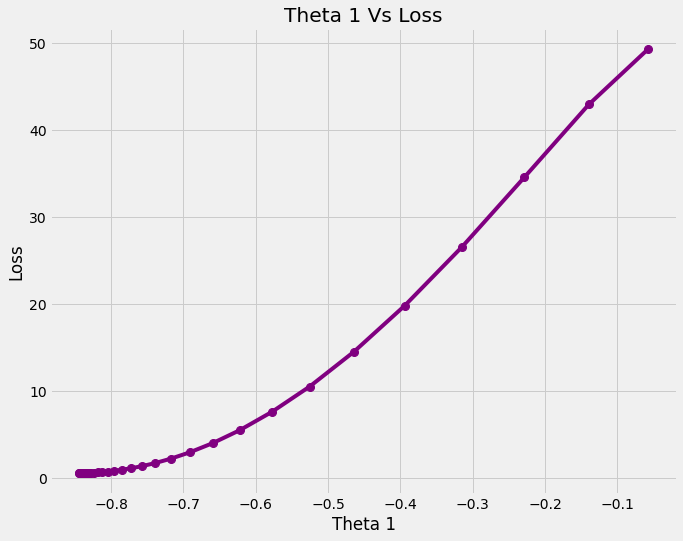

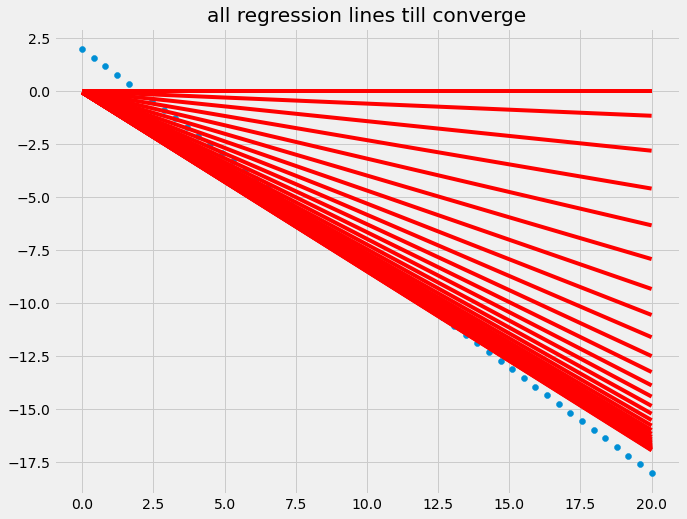

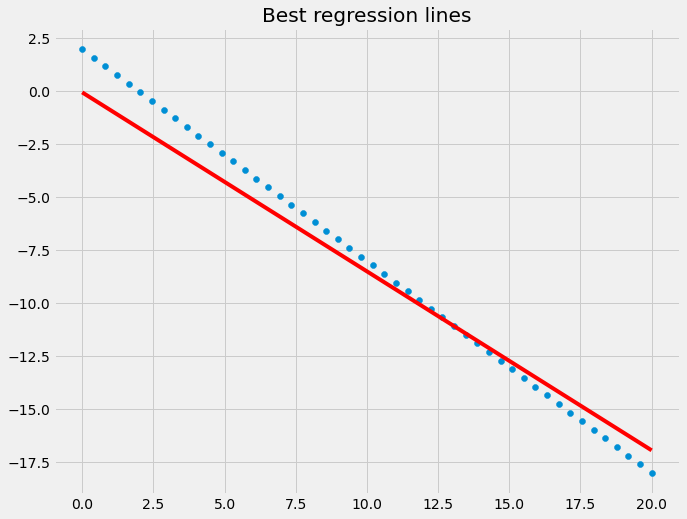

In [ ]:
plt.figure(figsize= (10, 8))
plt.style.use('fivethirtyeight')
plt.plot(np.arange(epochs + 1) ,Loss, marker = 'o', markersize = 8)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs Vs Loss')
plt.show()

plt.figure(figsize= (10, 8))
plt.plot(theta0 , Loss, color = 'purple', marker = 'o', markersize = 8)
plt.title('Learning Rate = 0.0005, Gamma = 0.5')
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.title('Theta 0 Vs Loss')
plt.show()

plt.figure(figsize= (10, 8))
plt.plot(theta1 , Loss, color = 'purple', marker = 'o', markersize = 8)
plt.title('Learning Rate = 0.0005, Gamma = 0.5')
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.title('Theta 1 Vs Loss')
plt.show()

plt.figure(figsize= (10, 8))
plt.scatter(X, y)
for line in y_pred:
  plt.plot(X, line, color = 'red')
plt.title('all regression lines till converge')
plt.show()

plt.figure(figsize= (10, 8))
plt.scatter(X, y)
plt.plot(X, y_pred[-1], color = 'red')
plt.title('Best regression lines')
plt.show()

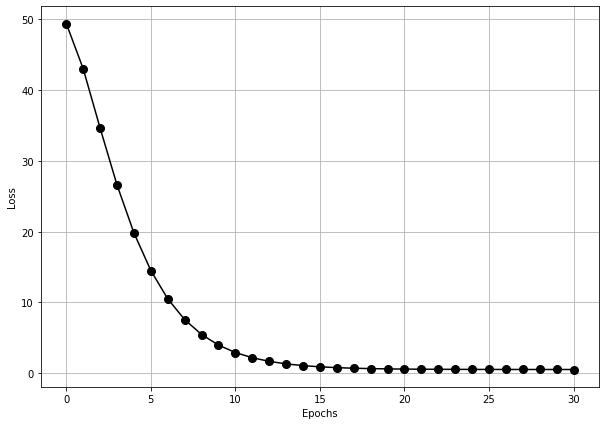

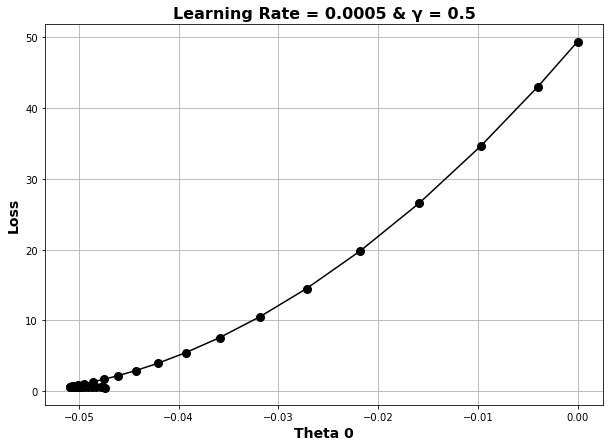

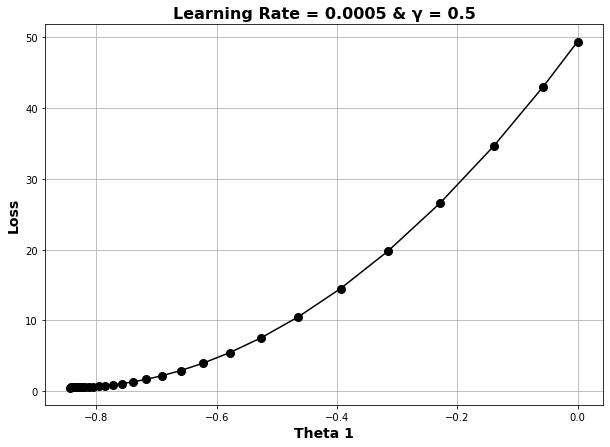

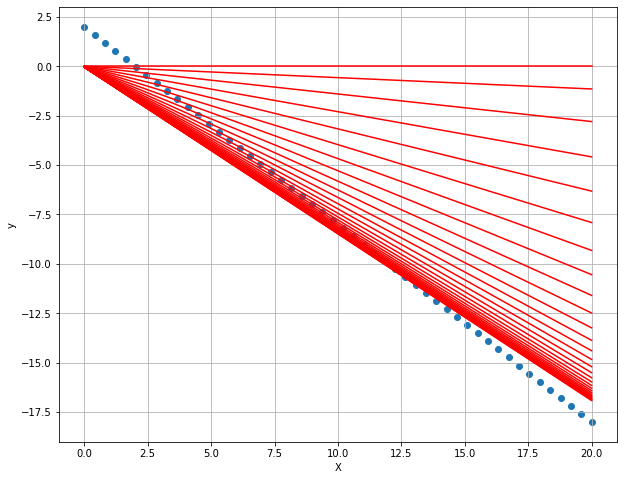

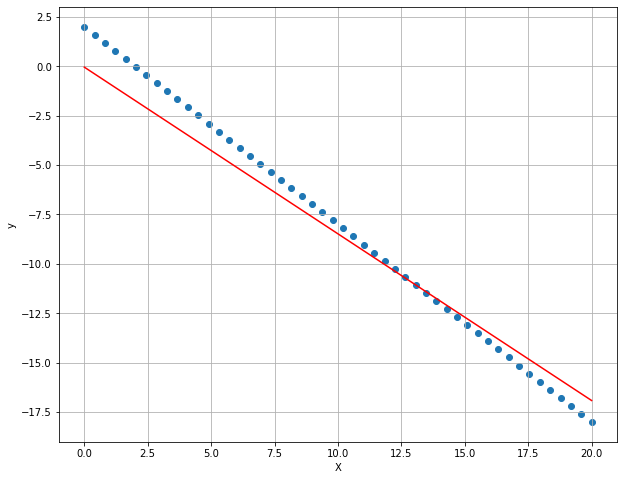

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [ ]:
theta0, theta1, y_pred, Loss, J, h, epochs = MomentumGD(X, y, epochs = 300, alpha = 0.0005, Gamma = 0.9)

****************** Iteration 0 ******************** 

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

Error Vector: [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ] 

J = 49.34693877551021 

Gradient Vector: 
 [[  8.        ]
 [114.69387755]] 

Gradient Vector Norm: 114.97254258164628 

theta_0_new : -0.004
theta_1_new : -0.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

In [ ]:
r2_score(y, h)

0.9735481947368928

r2_score 0.973589591111118


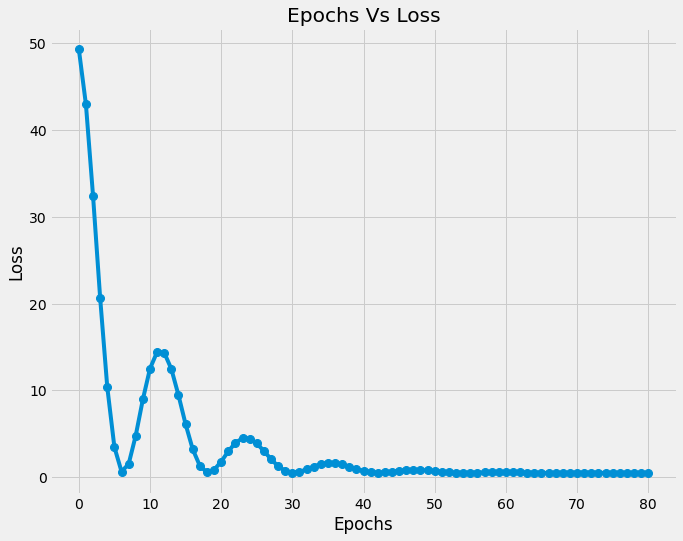

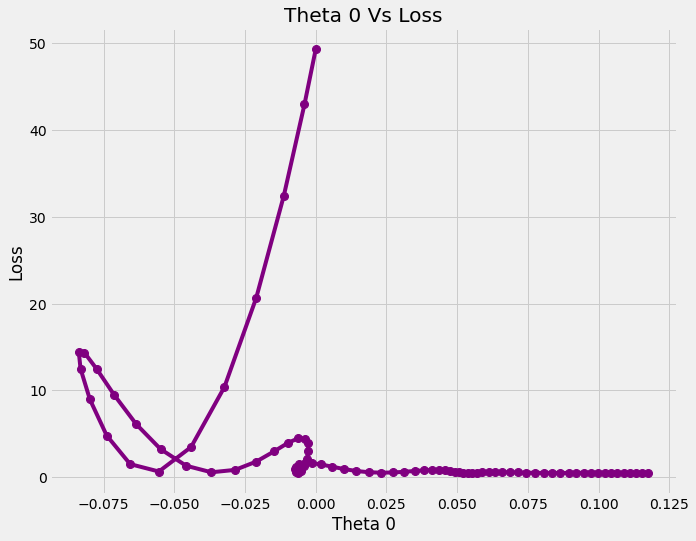

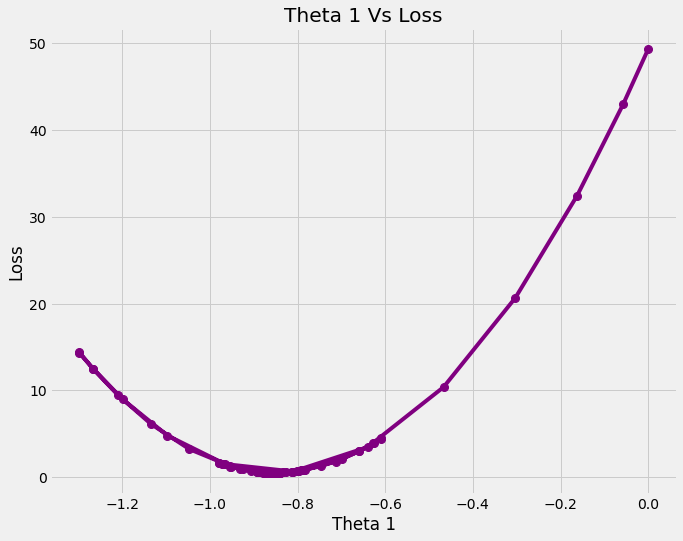

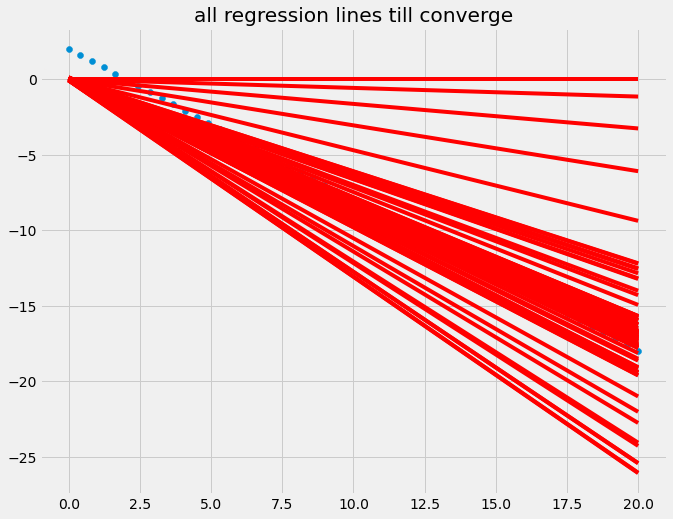

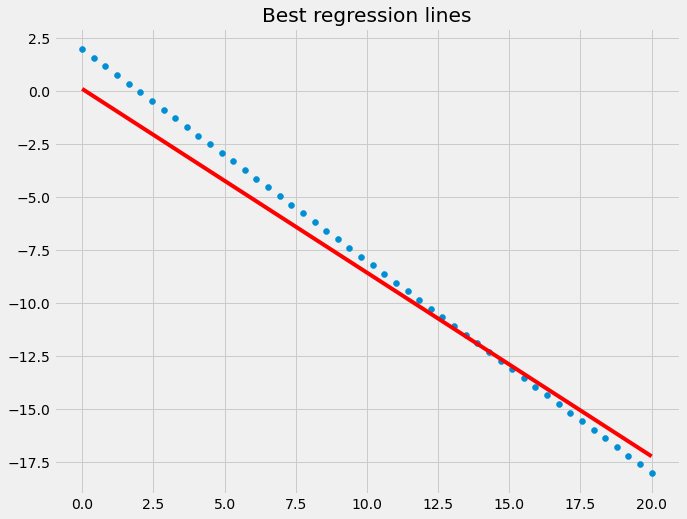

In [ ]:
plt.figure(figsize= (10, 8))
plt.style.use('fivethirtyeight')
plt.plot(np.arange(epochs + 1) ,Loss, marker = 'o', markersize = 8)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs Vs Loss')
plt.show()

plt.figure(figsize= (10, 8))
plt.plot(theta0 , Loss, color = 'purple', marker = 'o', markersize = 8)
plt.title('Learning Rate = 0.0005, Gamma = 0.9')
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.title('Theta 0 Vs Loss')
plt.show()

plt.figure(figsize= (10, 8))
plt.plot(theta1 , Loss, color = 'purple', marker = 'o', markersize = 8)
plt.title('Learning Rate =  0.0005, Gamma = 0.9')
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.title('Theta 1 Vs Loss')
plt.show()

plt.figure(figsize= (10, 8))
plt.scatter(X, y)
for line in y_pred:
  plt.plot(X, line, color = 'red')
plt.title('all regression lines till converge')
plt.show()

plt.figure(figsize= (10, 8))
plt.scatter(X, y)
plt.plot(X, y_pred[-1], color = 'red')
plt.title('Best regression lines')
plt.show()

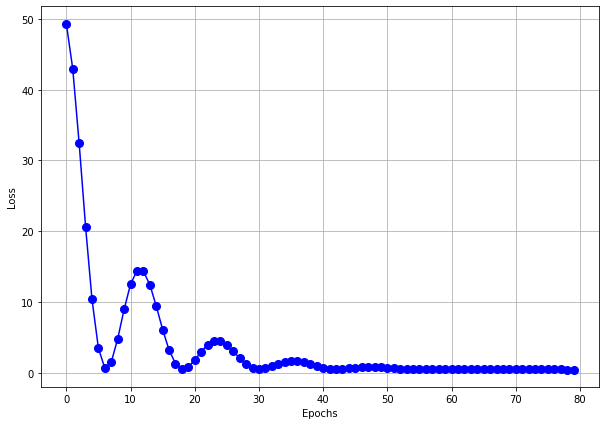

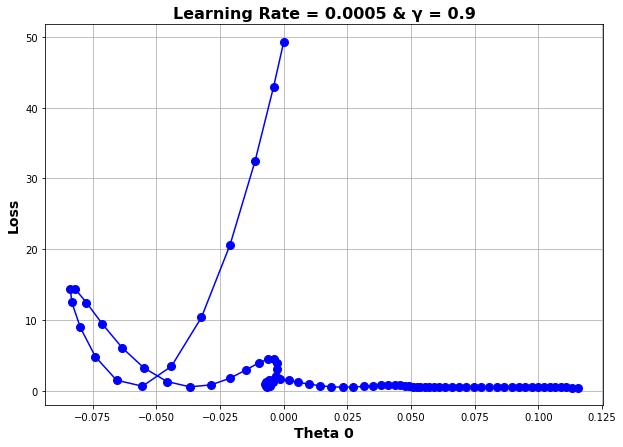

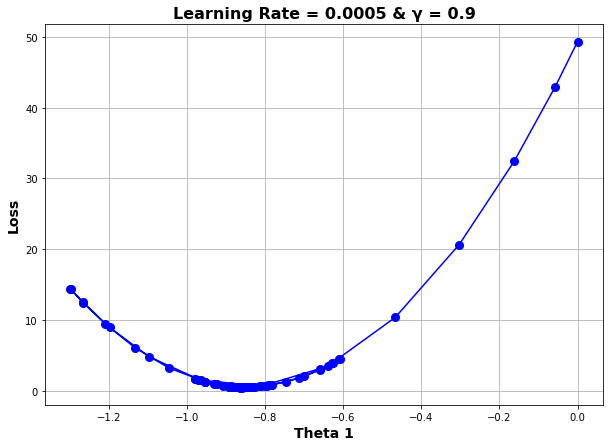

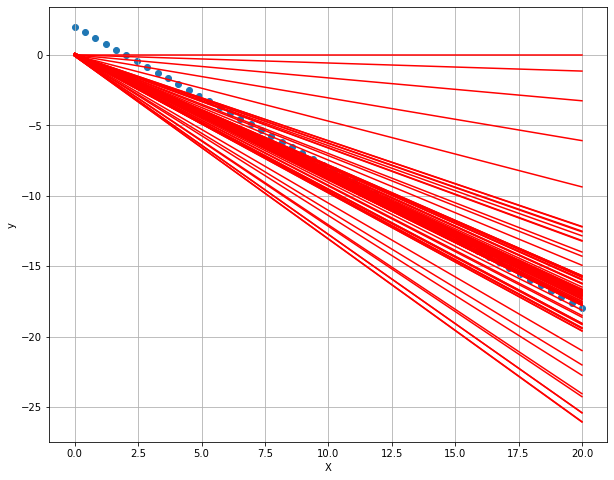

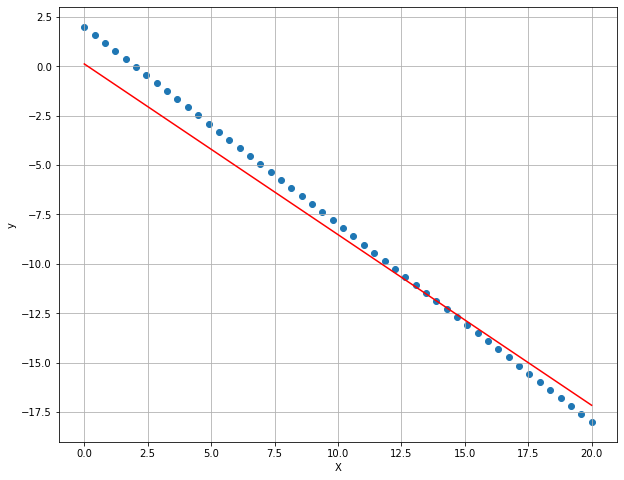

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [ ]:
theta0, theta1, y_pred, Loss, J, h, epochs = MomentumGD(X, y, epochs = 300, alpha = 0.0005, Gamma = 0.89)

****************** Iteration 0 ******************** 

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

Error Vector: [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ] 

J = 49.34693877551021 

Gradient Vector: 
 [[  8.        ]
 [114.69387755]] 

Gradient Vector Norm: 114.97254258164628 

theta_0_new : -0.004
theta_1_new : -0.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

In [ ]:
r2_score(y, h)

0.9720881737984594

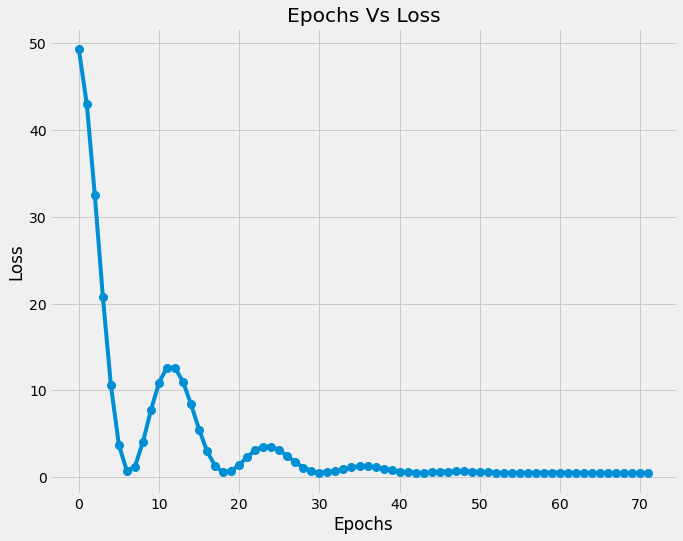

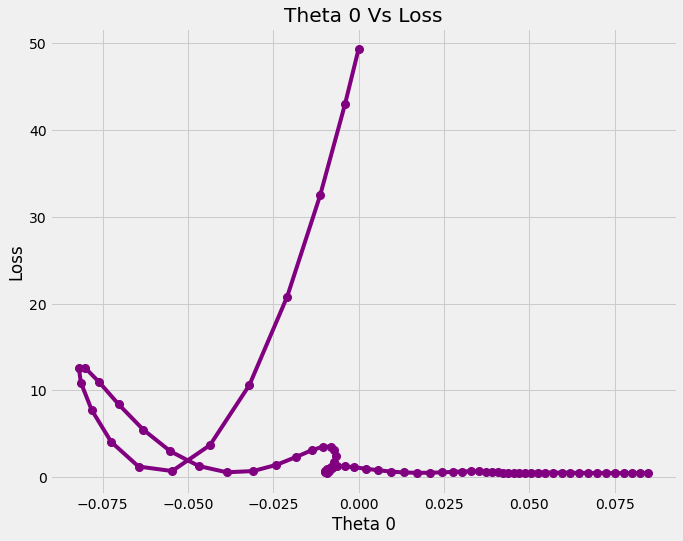

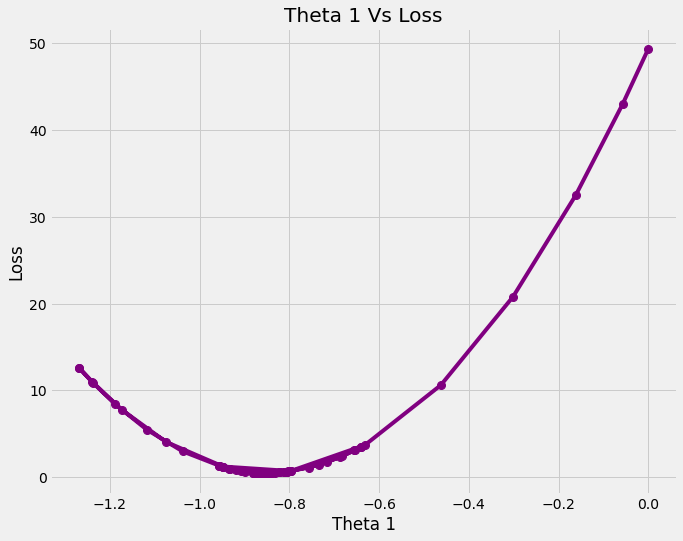

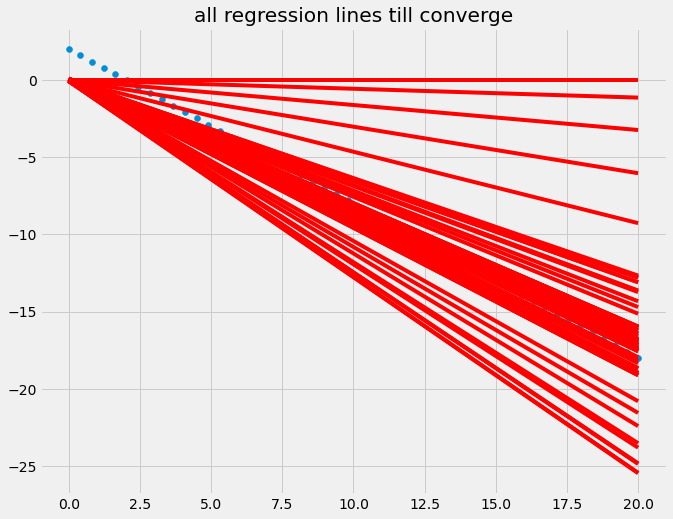

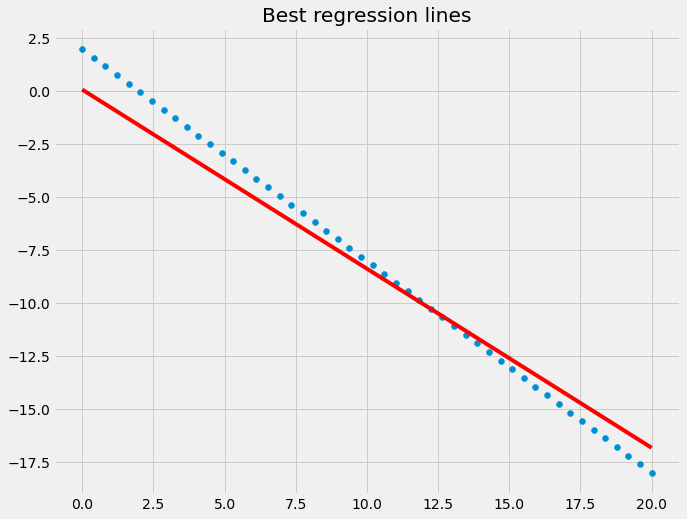

In [ ]:
plt.figure(figsize= (10, 8))
plt.style.use('fivethirtyeight')
plt.plot(np.arange(epochs + 1) ,Loss, marker = 'o', markersize = 8)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs Vs Loss')
plt.show()

plt.figure(figsize= (10, 8))
plt.plot(theta0 , Loss, color = 'purple', marker = 'o', markersize = 8)
plt.title('Learning Rate = 0.0005, Gamma = 0.89')
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.title('Theta 0 Vs Loss')
plt.show()

plt.figure(figsize= (10, 8))
plt.plot(theta1 , Loss, color = 'purple', marker = 'o', markersize = 8)
plt.title('Learning Rate =  0.0005, Gamma = 0.89')
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.title('Theta 1 Vs Loss')
plt.show()

plt.figure(figsize= (10, 8))
plt.scatter(X, y)
for line in y_pred:
  plt.plot(X, line, color = 'red')
plt.title('all regression lines till converge')
plt.show()

plt.figure(figsize= (10, 8))
plt.scatter(X, y)
plt.plot(X, y_pred[-1], color = 'red')
plt.title('Best regression lines')
plt.show()

r2 score =  0.972435565060376


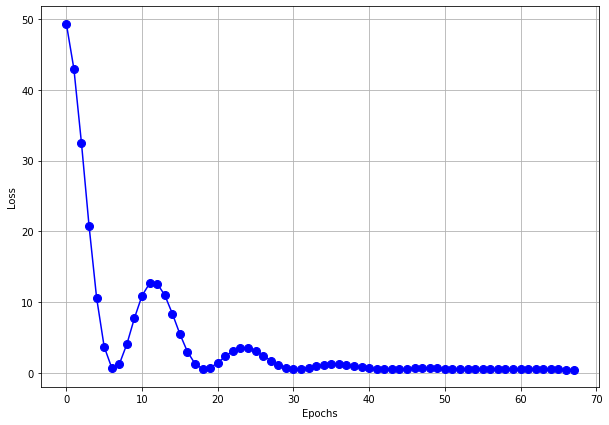

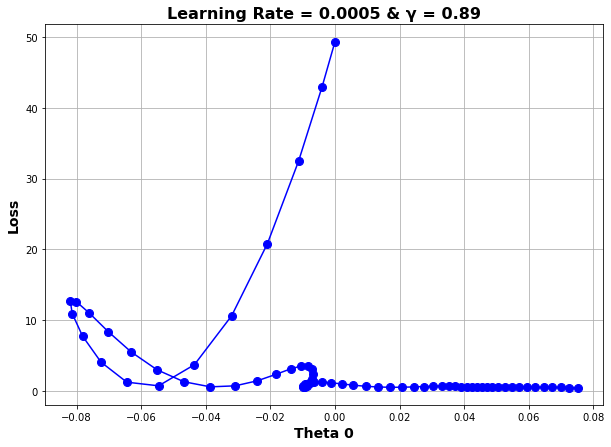

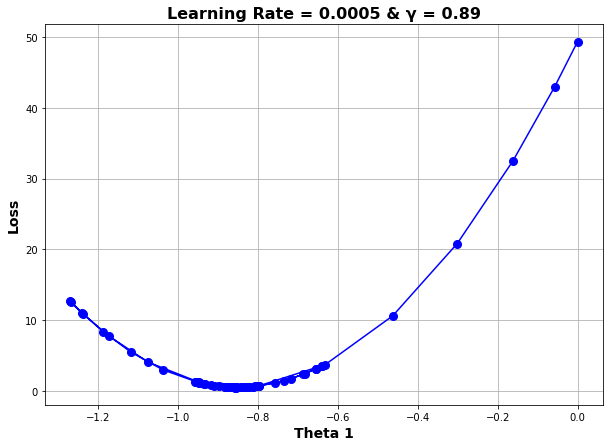

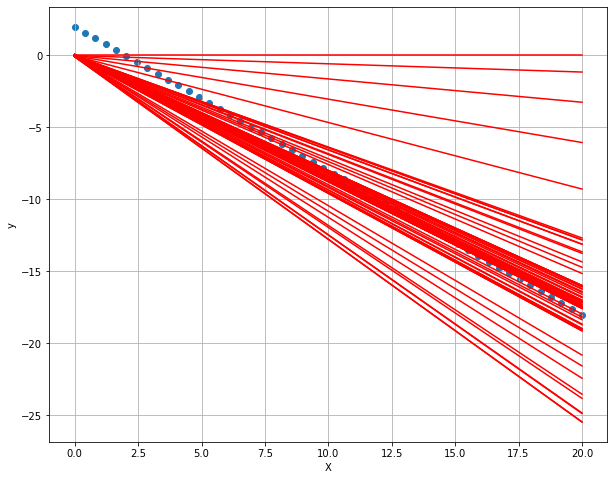

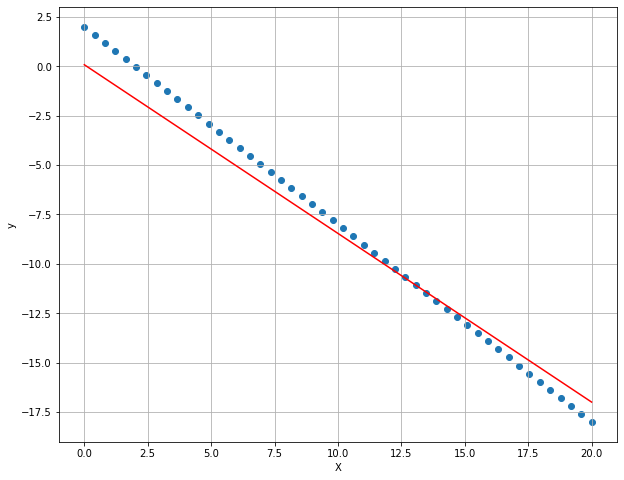

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [ ]:
theta0, theta1, y_pred, Loss, J, h, epochs = MomentumGD(X, y, epochs = 300, alpha = 0.0005, Gamma = 0.99)

Streaming output truncated to the last 5000 lines.
 -12.29711215 -12.85007505 -13.40303795 -13.95600085 -14.50896375
 -15.06192665 -15.61488954 -16.16785244 -16.72081534 -17.27377824
 -17.82674114 -18.37970404 -18.93266694 -19.48562984 -20.03859274
 -20.59155564 -21.14451854 -21.69748144 -22.25044434 -22.80340724
 -23.35637014 -23.90933304 -24.46229594 -25.01525884 -25.56822174] 

Error Vector: [-0.47303966 -0.61783929 -0.76263892 -0.90743856 -1.05223819 -1.19703783
 -1.34183746 -1.4866371  -1.63143673 -1.77623636 -1.921036   -2.06583563
 -2.21063527 -2.3554349  -2.50023454 -2.64503417 -2.78983381 -2.93463344
 -3.07943307 -3.22423271 -3.36903234 -3.51383198 -3.65863161 -3.80343125
 -3.94823088 -4.09303051 -4.23783015 -4.38262978 -4.52742942 -4.67222905
 -4.81702869 -4.96182832 -5.10662795 -5.25142759 -5.39622722 -5.54102686
 -5.68582649 -5.83062613 -5.97542576 -6.1202254  -6.26502503 -6.40982466
 -6.5546243  -6.69942393 -6.84422357 -6.9890232  -7.13382284 -7.27862247
 -7.4234221  -7.56

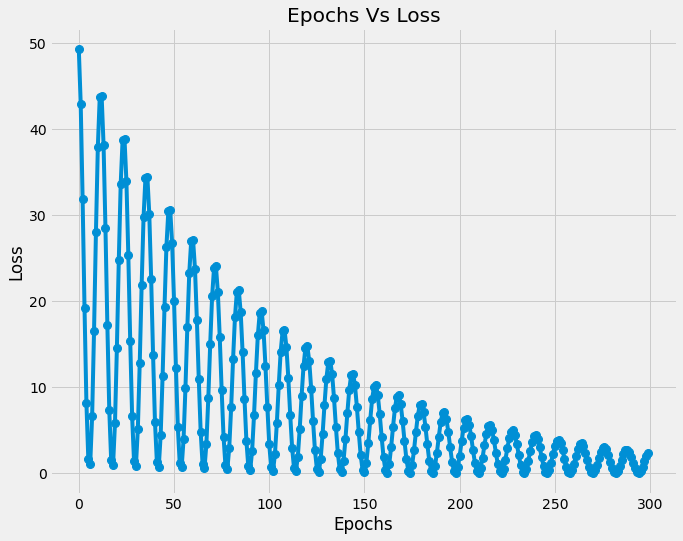

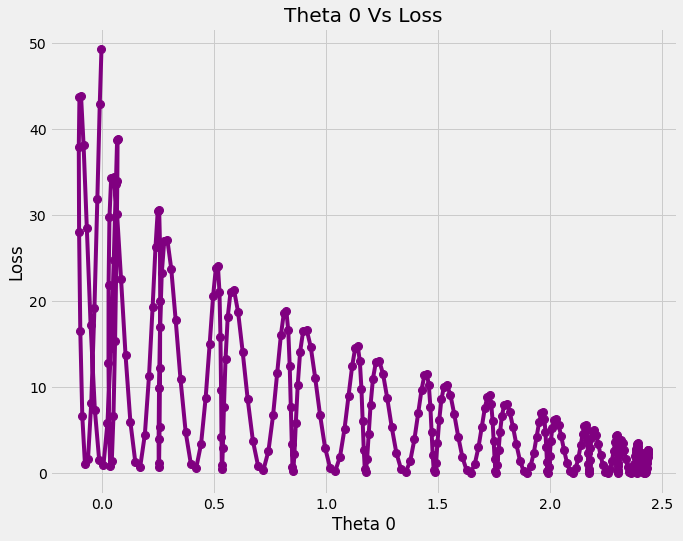

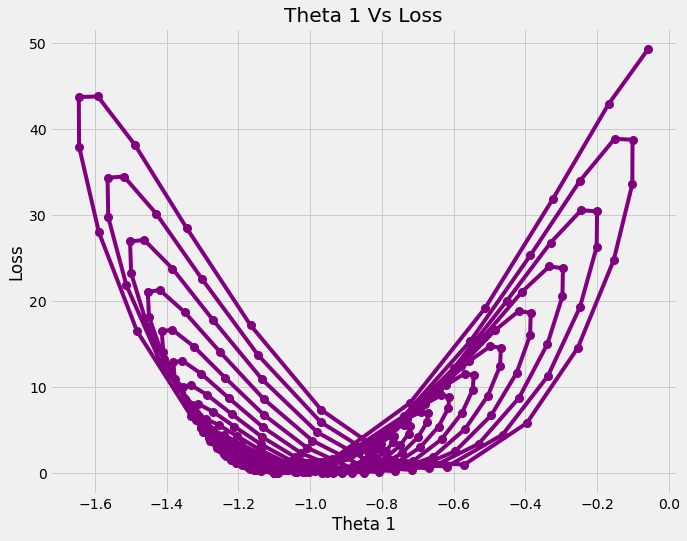

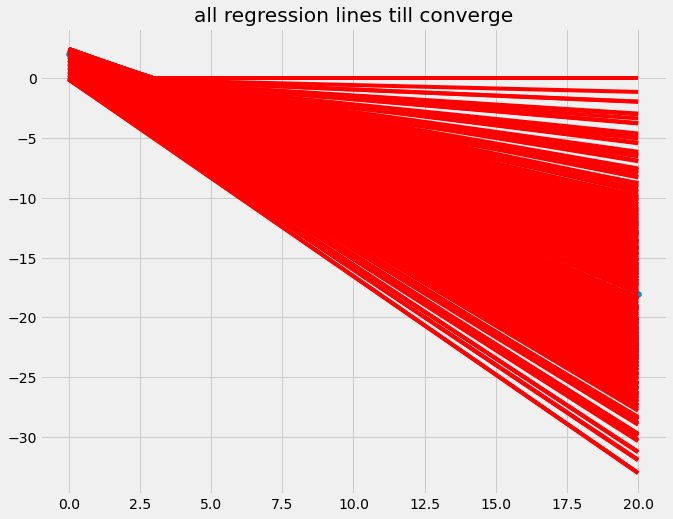

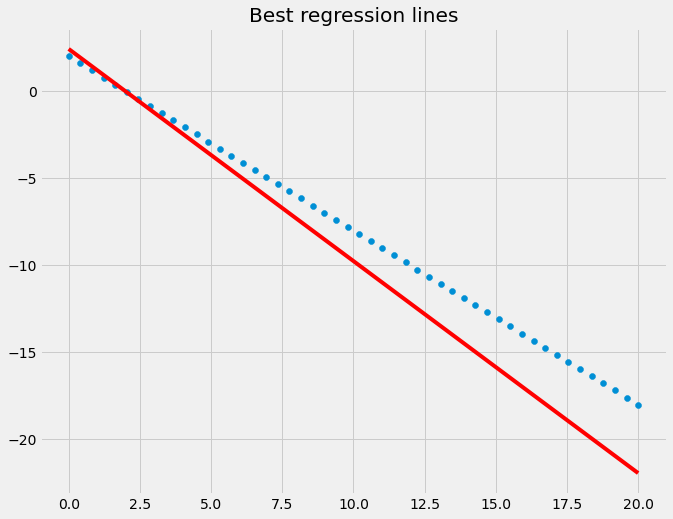

In [ ]:
plt.figure(figsize= (10, 8))
plt.style.use('fivethirtyeight')
plt.plot(np.arange(epochs + 1) ,Loss, marker = 'o', markersize = 8)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs Vs Loss')
plt.show()

plt.figure(figsize= (10, 8))
plt.plot(theta0 , Loss, color = 'purple', marker = 'o', markersize = 8)
plt.title('Learning Rate = 0.0005, Gamma = 0.99')
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.title('Theta 0 Vs Loss')
plt.show()

plt.figure(figsize= (10, 8))
plt.plot(theta1 , Loss, color = 'purple', marker = 'o', markersize = 8)
plt.title('Learning Rate =  0.0005, Gamma = 0.99')
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.title('Theta 1 Vs Loss')
plt.show()

plt.figure(figsize= (10, 8))
plt.scatter(X, y)
for line in y_pred:
  plt.plot(X, line, color = 'red')
plt.title('all regression lines till converge')
plt.show()

plt.figure(figsize= (10, 8))
plt.scatter(X, y)
plt.plot(X, y_pred[-1], color = 'red')
plt.title('Best regression lines')
plt.show()

In [ ]:
theta0, theta1, y_pred, Loss, J, h, epochs = MomentumGD(X, y, epochs = 300, alpha = 0.0005, Gamma = 0.001)

****************** Iteration 0 ******************** 

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

Error Vector: [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ] 

J = 49.34693877551021 

Gradient Vector: 
 [[  8.        ]
 [114.69387755]] 

Gradient Vector Norm: 114.97254258164628 

theta_0_new : -0.004
theta_1_new : -0.

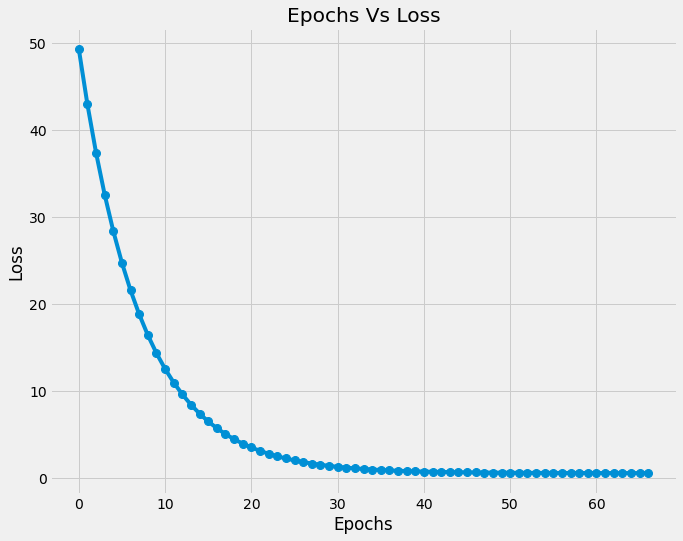

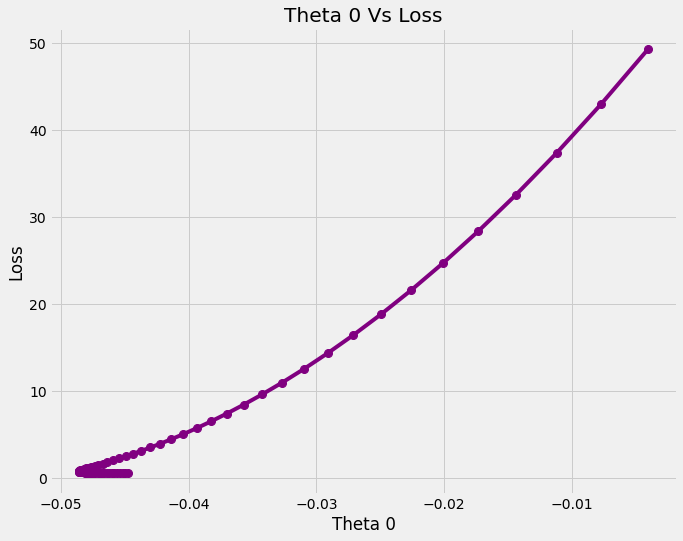

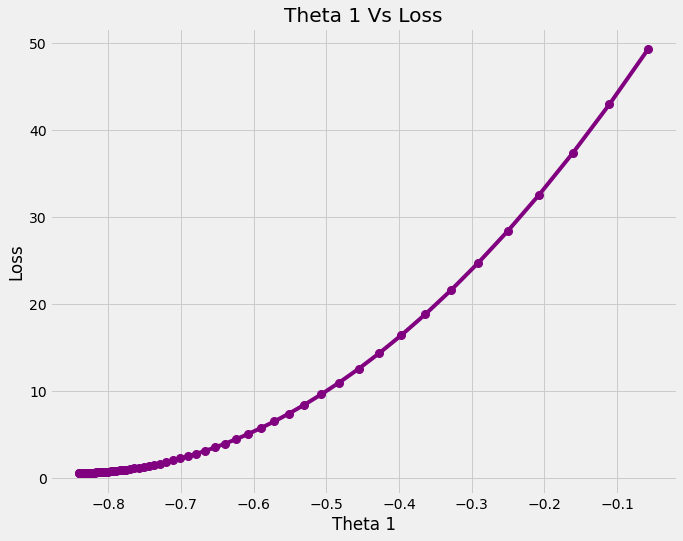

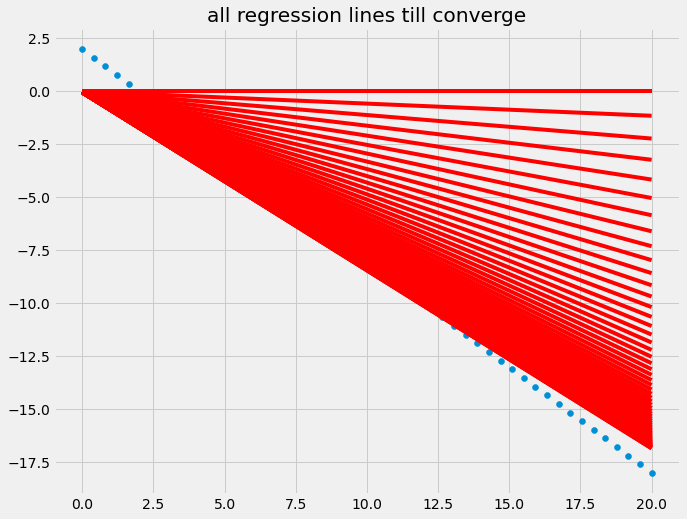

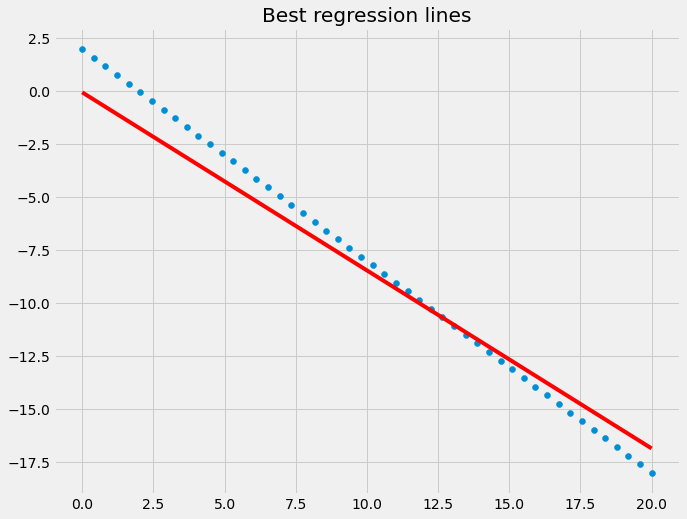

In [ ]:
plt.figure(figsize= (10, 8))
plt.style.use('fivethirtyeight')
plt.plot(np.arange(epochs + 1) ,Loss, marker = 'o', markersize = 8)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs Vs Loss')
plt.show()

plt.figure(figsize= (10, 8))
plt.plot(theta0 , Loss, color = 'purple', marker = 'o', markersize = 8)
plt.title('Learning Rate = 0.0005, Gamma = 0.001')
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.title('Theta 0 Vs Loss')
plt.show()

plt.figure(figsize= (10, 8))
plt.plot(theta1 , Loss, color = 'purple', marker = 'o', markersize = 8)
plt.title('Learning Rate =  0.0005, Gamma = 0.001')
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.title('Theta 1 Vs Loss')
plt.show()

plt.figure(figsize= (10, 8))
plt.scatter(X, y)
for line in y_pred:
  plt.plot(X, line, color = 'red')
plt.title('all regression lines till converge')
plt.show()

plt.figure(figsize= (10, 8))
plt.scatter(X, y)
plt.plot(X, y_pred[-1], color = 'red')
plt.title('Best regression lines')
plt.show()

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

In [ ]:
def NagGD(X, y, epochs, alpha, Gamma):
  theta_0 = 0
  theta_1 = 0
  Vt0 = 0
  Vt1 = 0
  theta0 = []
  theta1 = []
  y_pred = []
  Loss = []
  
  callback = 0


  for i in range(epochs):
    print(f"****************** Iteration {i} ******************** \n")

    theta_temp_0 = theta_0 - Gamma * Vt0
    theta_temp_1 = theta_1 - Gamma * Vt1

    h = theta_temp_0 +  theta_temp_1 * X
    y_pred.append(h)
    print(f"h(x): {h} \n")

    m = len(X)
    error =  (h - y)
    print(f"Error Vector: {error} \n")

    J = 1/(2*m) * sum(error**2)
    if (i > 0) and (abs(Loss[i - 1] - J) < 0.001):
      callback += 1
    
    Loss.append(J)
    print(f"J = {J} \n")

    d_theta_0 = 1/m * sum(error)
    d_theta_1 = 1/m * sum(error * X)
    Gradient_Vector = np.array([[d_theta_0], [d_theta_1]])
    print(f"Gradient Vector: \n {Gradient_Vector} \n")

    GradVec_Norm = np.linalg.norm(Gradient_Vector)
    print(f"Gradient Vector Norm: {GradVec_Norm} \n")

    theta_0 = theta_temp_0 - alpha * d_theta_0
    theta_1 = theta_temp_1 - alpha * d_theta_1

    Vt0 = Gamma * Vt0 + alpha * d_theta_0
    Vt1 = Gamma * Vt1 + alpha * d_theta_1

    theta0.append(theta_0)
    theta1.append(theta_1)

    print(f"theta_0_new : {theta_0}")
    print(f"theta_1_new : {theta_1} \n")

    print(f"v_0 : {Vt0}")
    print(f"v_1 : {Vt1}")
    

 
    if J <= 0.001 or GradVec_Norm <= 0.001 or callback == 2:
      break

  print("\n****************** Training Report ******************** \n")
  print(f"Gradient Descent converged after {i} epochs \n")
  print(f"theta_0_Opt : {theta_0}")
  print(f"theta_1_Opt : {theta_1} \n")
  print(f"Error Vector: \n {error} \n")
  print(f"Cost = {J} \n")
  print(f"h(x) = y_predict: \n {h} \n")
  print(f"y_actual: \n {y}")

  return theta0, theta1, y_pred, Loss, J, h, i

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [ ]:
theta0, theta1, y_pred, Loss, J, h, epochs = NagGD(X, y, epochs = 300, alpha = 0.0005, Gamma = 0.9)

****************** Iteration 0 ******************** 

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

Error Vector: [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ] 

J = 49.34693877551021 

Gradient Vector: 
 [[  8.        ]
 [114.69387755]] 

Gradient Vector Norm: 114.97254258164628 

theta_0_new : -0.004
theta_1_new : -0.

In [ ]:
r2_score(y, h)

0.9707851290804633

r2_score 0.971103130756324


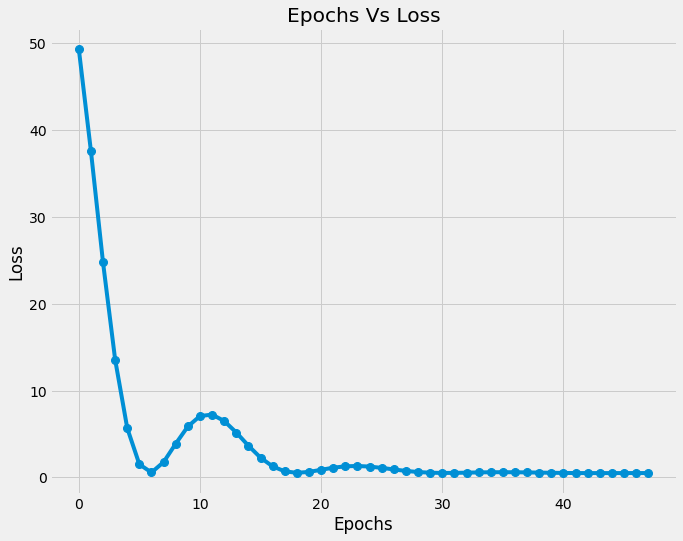

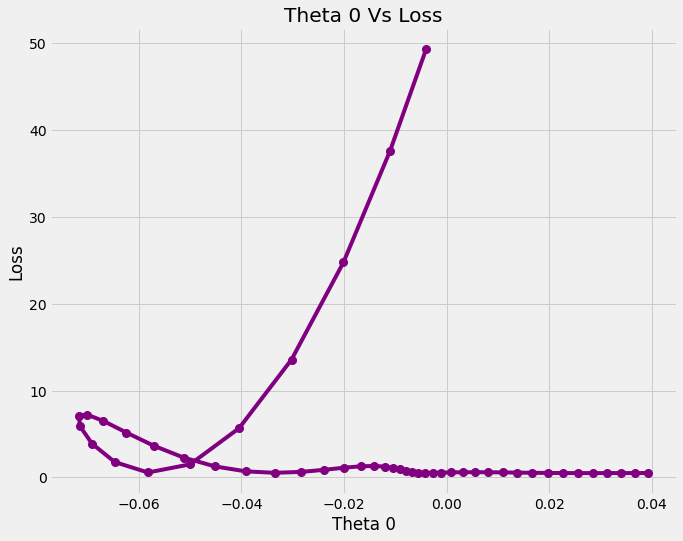

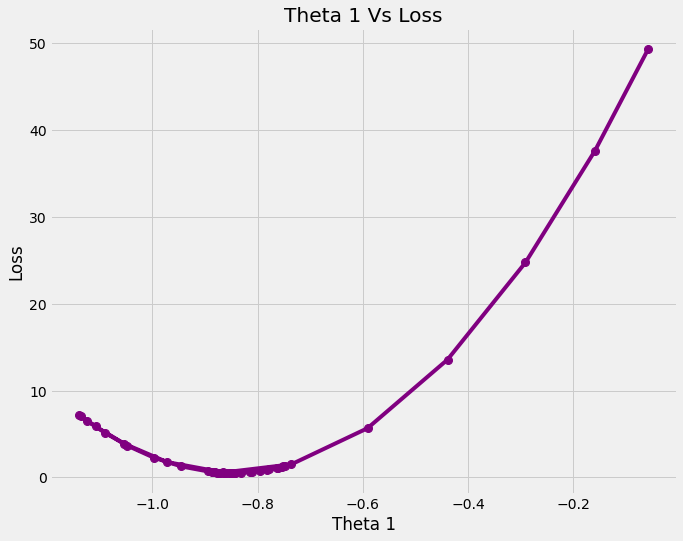

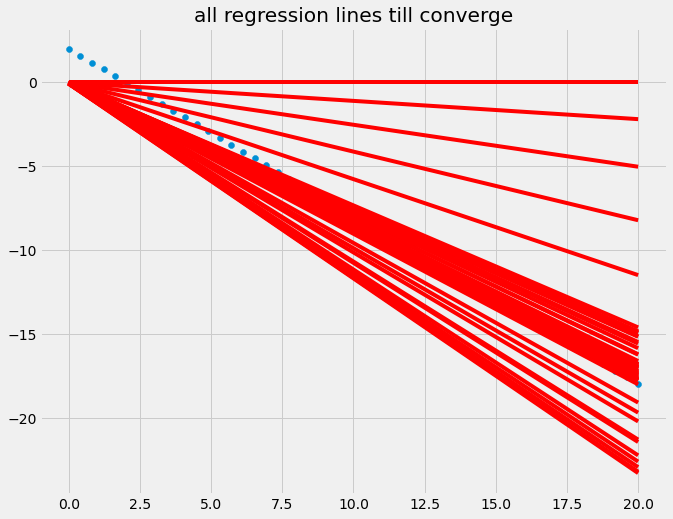

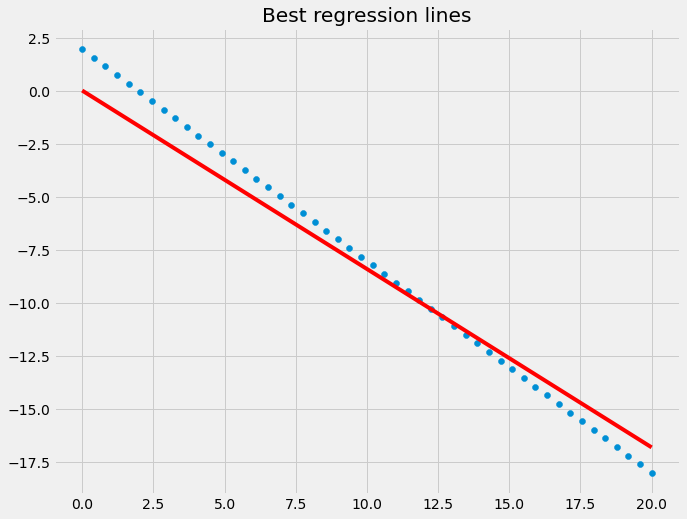

In [ ]:
plt.figure(figsize= (10, 8))
plt.style.use('fivethirtyeight')
plt.plot(np.arange(epochs + 1) ,Loss, marker = 'o', markersize = 8)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs Vs Loss')
plt.show()

plt.figure(figsize= (10, 8))
plt.plot(theta0 , Loss, color = 'purple', marker = 'o', markersize = 8)
plt.title('Learning Rate = 0.0005, Gamma = 0.9')
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.title('Theta 0 Vs Loss')
plt.show()

plt.figure(figsize= (10, 8))
plt.plot(theta1 , Loss, color = 'purple', marker = 'o', markersize = 8)
plt.title('Learning Rate =  0.0005, Gamma = 0.9')
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.title('Theta 1 Vs Loss')
plt.show()

plt.figure(figsize= (10, 8))
plt.scatter(X, y)
for line in y_pred:
  plt.plot(X, line, color = 'red')
plt.title('all regression lines till converge')
plt.show()

plt.figure(figsize= (10, 8))
plt.scatter(X, y)
plt.plot(X, y_pred[-1], color = 'red')
plt.title('Best regression lines')
plt.show()

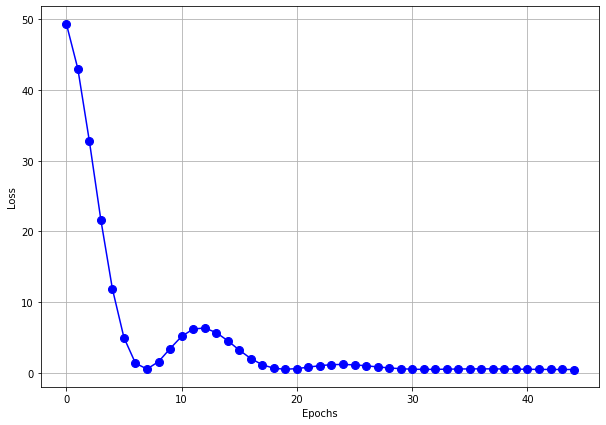

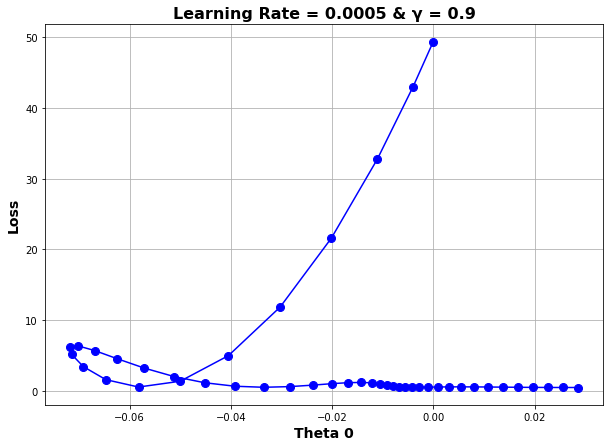

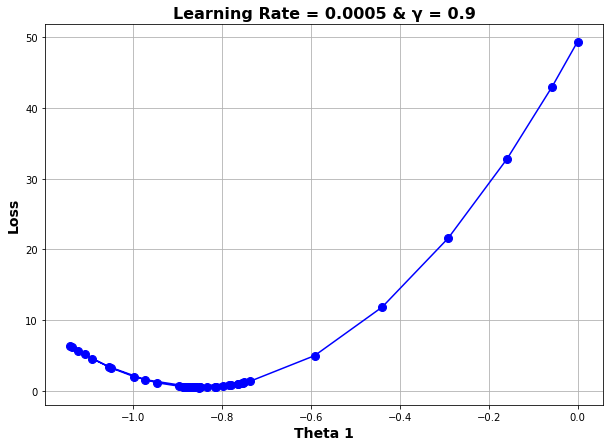

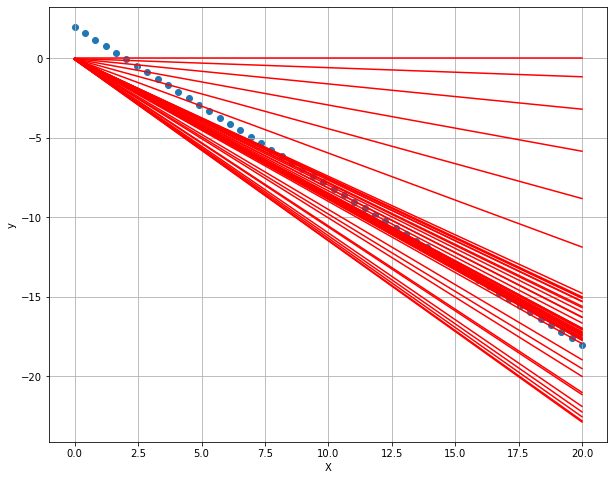

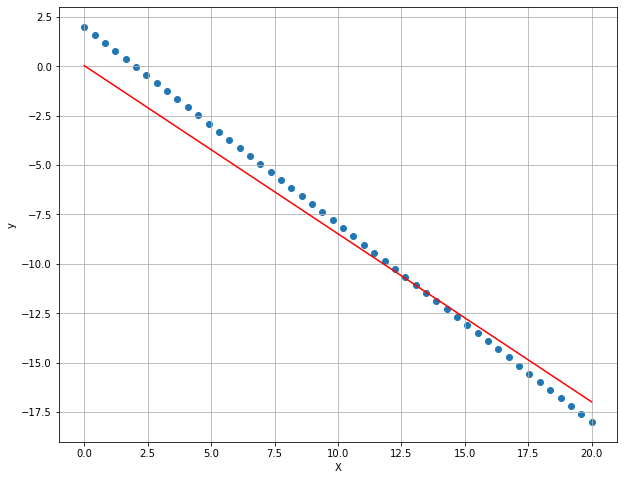

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [ ]:
theta0, theta1, y_pred, Loss, J, h, epochs = NagGD(X, y, epochs = 300, alpha = 0.0005, Gamma = 0.89)

****************** Iteration 0 ******************** 

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

Error Vector: [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ] 

J = 49.34693877551021 

Gradient Vector: 
 [[  8.        ]
 [114.69387755]] 

Gradient Vector Norm: 114.97254258164628 

theta_0_new : -0.004
theta_1_new : -0.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

In [ ]:
r2_score(y, h)

0.9709279628050848

r2 score =  0.9699718983158406


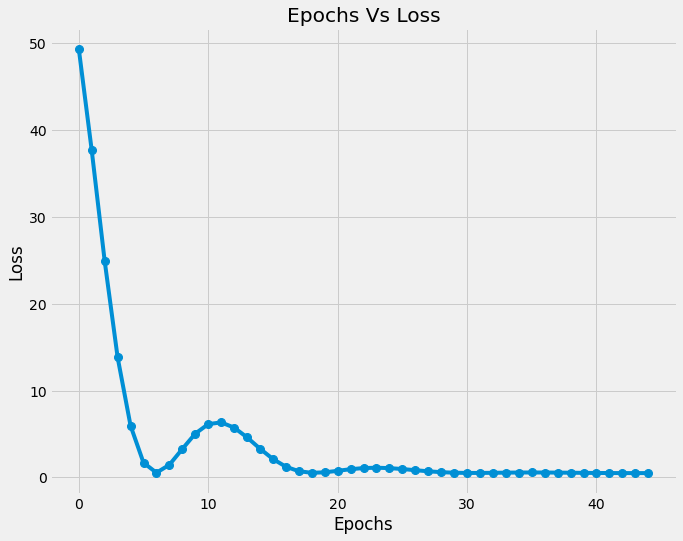

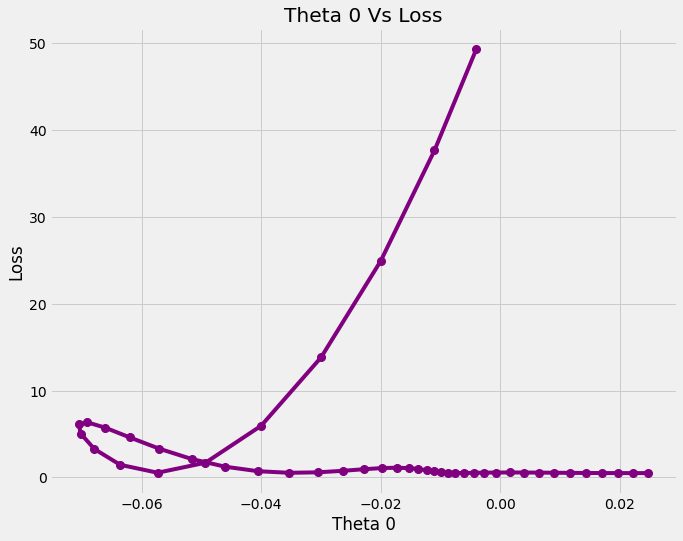

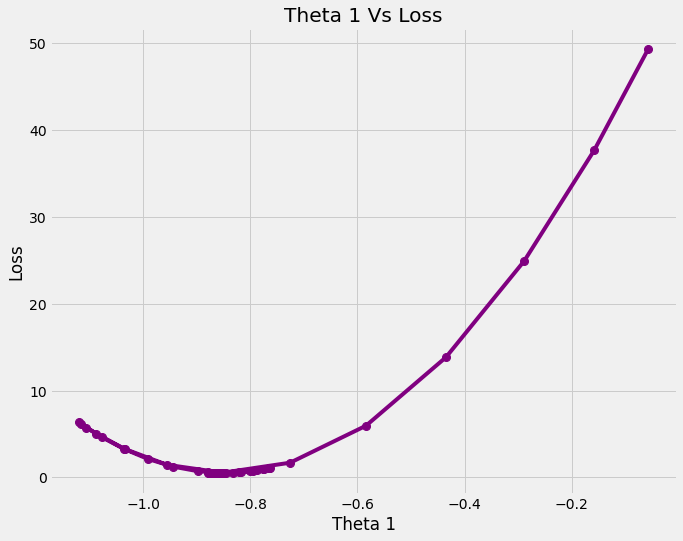

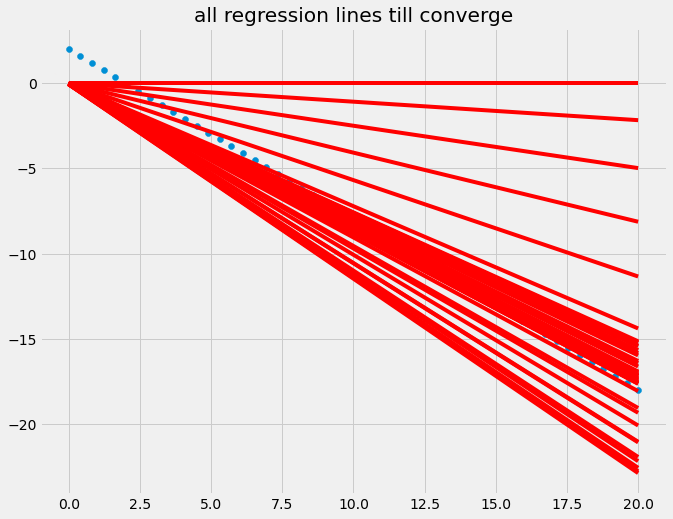

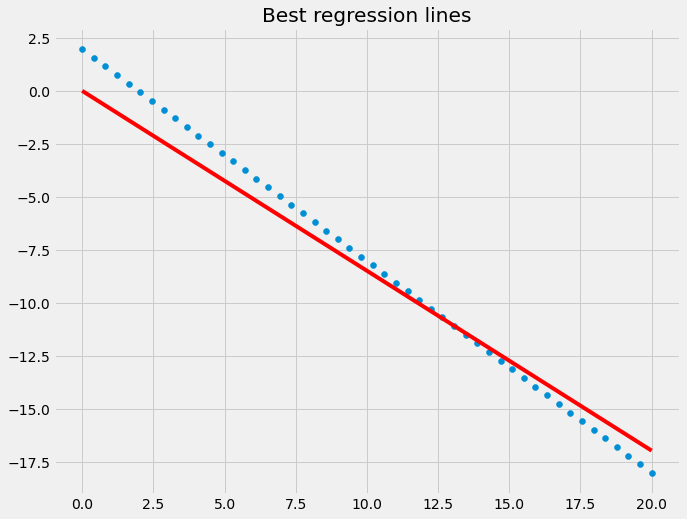

In [ ]:
plt.figure(figsize= (10, 8))
plt.style.use('fivethirtyeight')
plt.plot(np.arange(epochs + 1) ,Loss, marker = 'o', markersize = 8)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs Vs Loss')
plt.show()

plt.figure(figsize= (10, 8))
plt.plot(theta0 , Loss, color = 'purple', marker = 'o', markersize = 8)
plt.title('Learning Rate = 0.0005, Gamma = 0.9')
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.title('Theta 0 Vs Loss')
plt.show()

plt.figure(figsize= (10, 8))
plt.plot(theta1 , Loss, color = 'purple', marker = 'o', markersize = 8)
plt.title('Learning Rate =  0.0005, Gamma = 0.9')
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.title('Theta 1 Vs Loss')
plt.show()

plt.figure(figsize= (10, 8))
plt.scatter(X, y)
for line in y_pred:
  plt.plot(X, line, color = 'red')
plt.title('all regression lines till converge')
plt.show()

plt.figure(figsize= (10, 8))
plt.scatter(X, y)
plt.plot(X, y_pred[-1], color = 'red')
plt.title('Best regression lines')
plt.show()

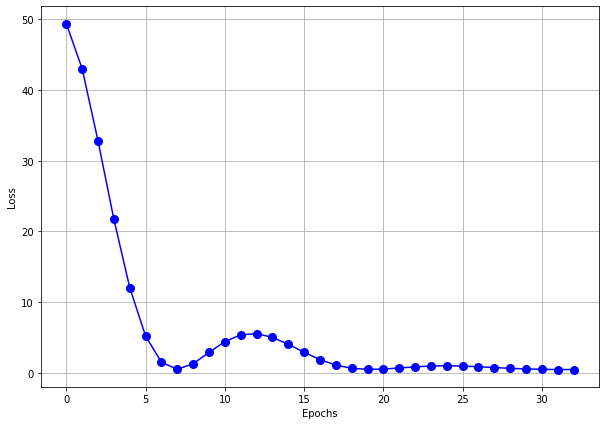

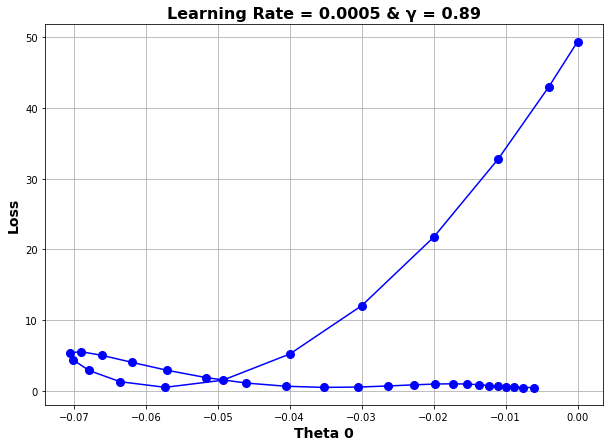

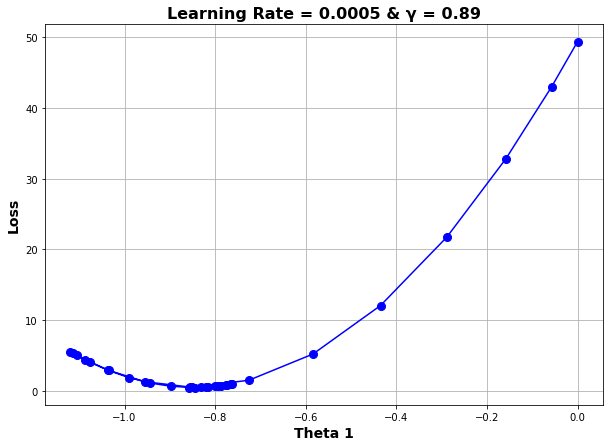

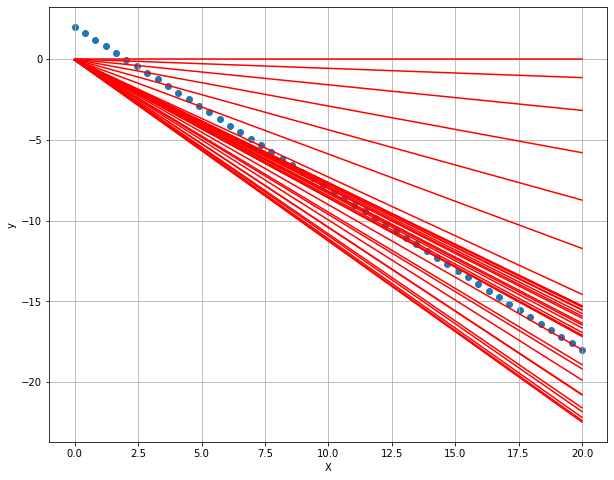

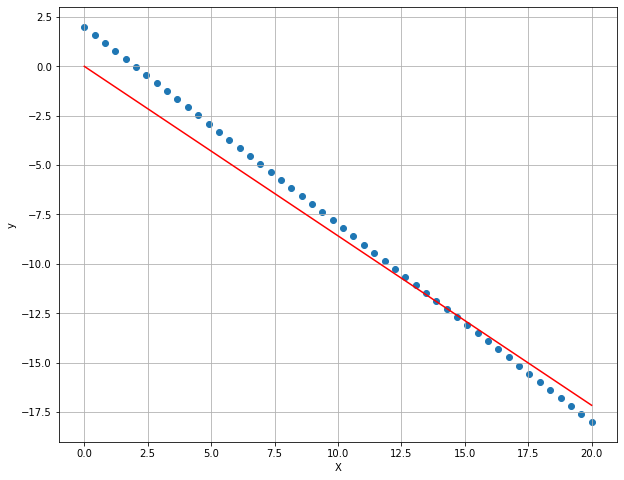